In [1]:
#Importing Libraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
data=pd.read_csv("C:\\Users\\lokes\\Downloads\\Customer Data.csv")

In [3]:
data

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


# EDA

In [4]:
data= data.drop('ID',axis=1)
data

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [5]:
data.describe()

,Age,Income,Gender,Marital Status,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             14 non-null     object
 1   Income          14 non-null     object
 2   Gender          14 non-null     object
 3   Marital Status  14 non-null     object
 4   Buys            14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [7]:
data.isnull().sum()

Age               0
Income            0
Gender            0
Marital Status    0
Buys              0
dtype: int64

In [8]:
data['Buys'].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

<AxesSubplot:xlabel='Buys', ylabel='count'>

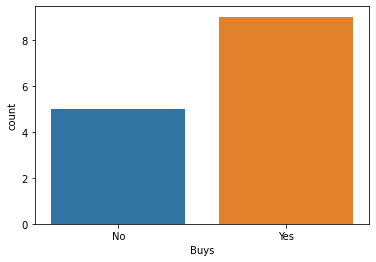

In [16]:
sns.countplot(data=data,x='Buys')

# Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
x=data.iloc[:,:-1]
x=x.apply(le.fit_transform)

In [20]:
x

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [21]:
y=data.iloc[:,-1]

In [22]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

# Model Building

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [24]:
test=np.array([1,1,0,0])
y_pred=classifier.predict([test])
print("predicted class for input is: ",y_pred[0])

predicted class for input is:  Yes


C:\Users\lokes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


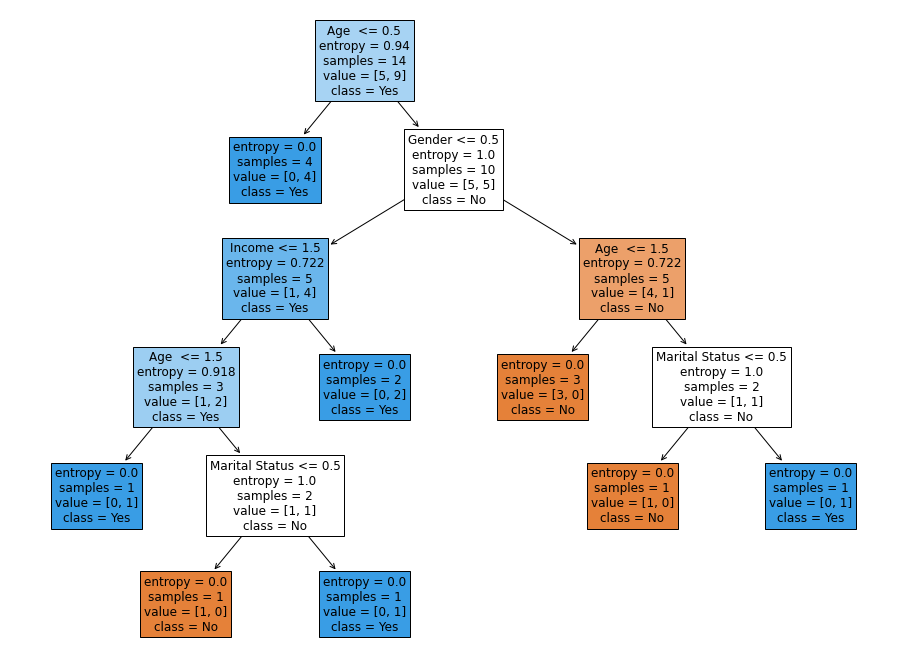

In [15]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(16,12))
a=plot_tree(classifier, feature_names=data.columns, fontsize=12, filled=True, class_names=['No','Yes'])

# Que= what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]? Write the concluding statement for the implemented application.

# for [Age<21,Income=Low, Gender= Female, Marital status= Married] array should be=[1,1,0,0].Lets Predict

In [26]:
classifier.predict([[1,1,0,0]])

C:\Users\lokes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

# Answer= If person has age<21 has low income is a female and Married and she buys Lipstick